In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Concrete_Data.xls')

In [4]:
df.head(5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


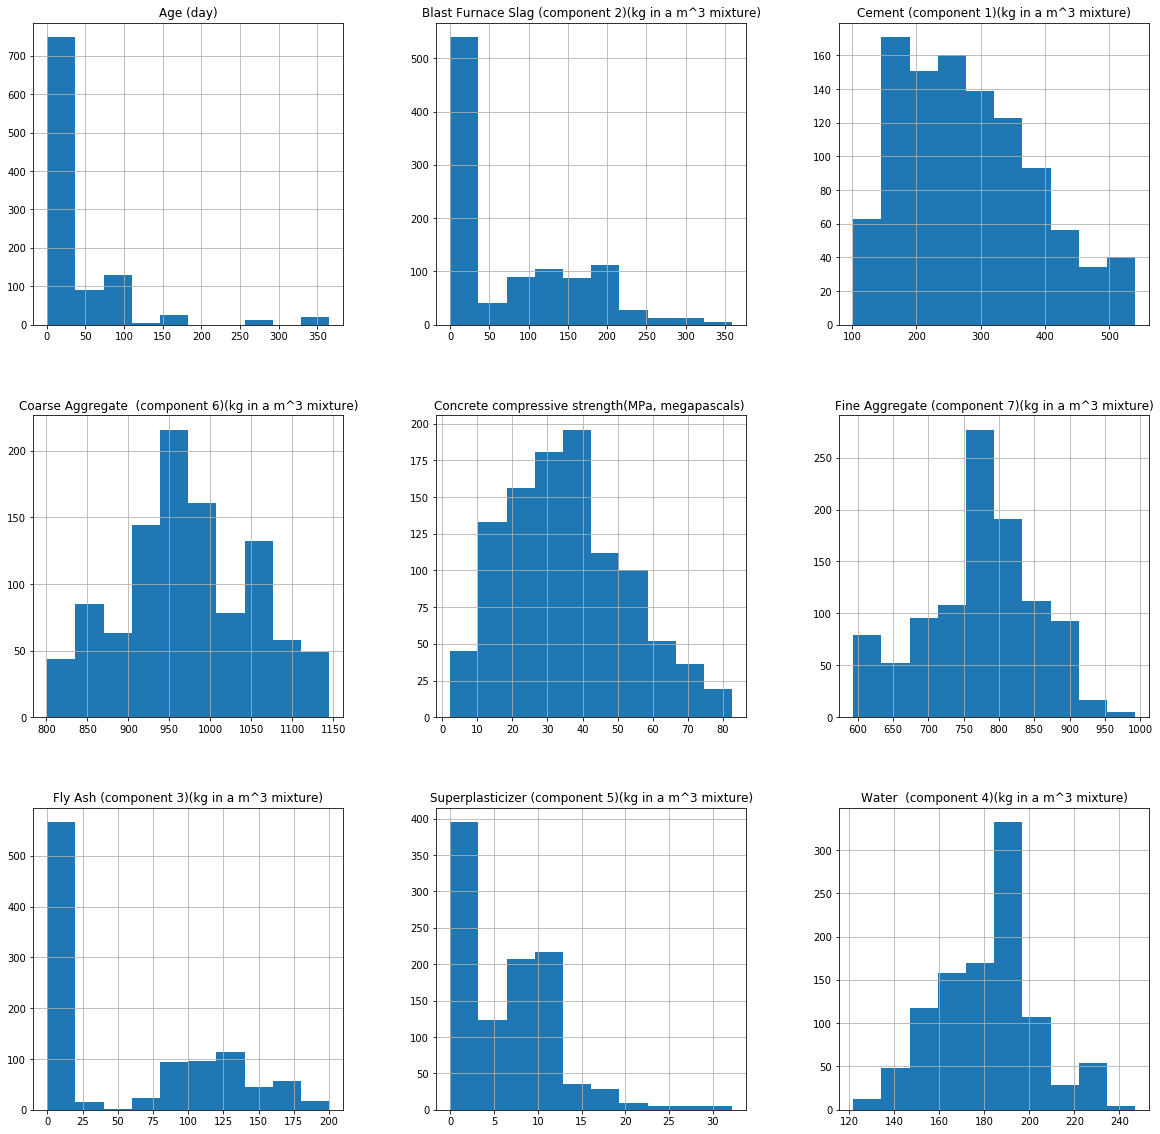

<Figure size 2160x1440 with 0 Axes>

In [8]:
df.hist(figsize=(20,20))
plt.show()

In [11]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [77]:
import seaborn as sns

In [33]:
#target: Concrete compressive strength(MPa, megapascals)
y = df.iloc[:,-1]

In [34]:
# Features selection
cols=[0,3,5,6,7]
X = df.iloc[:,cols]

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
#Data split as train and test
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

In [45]:
# Instantiate the model
model = DecisionTreeRegressor(random_state=1)

#Fit(Train) the model
model.fit(X_train, y_train)

#Predict using the model

predict=model.predict(X_test)

#Calculate the mean absolute error

mae = mean_absolute_error(predict, y_test)

print('Average absolute error: {}'.format(mae))

Average absolute error: 4.834452749727292


In [52]:
def modelOpt(max_leaf_nodes, X_train, X_test,y_train,y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes,random_state=1)

    #Fit(Train) the model
    model.fit(X_train, y_train)

    #Predict using the model

    predict=model.predict(X_test)

    #Calculate the mean absolute error

    mae = mean_absolute_error(predict, y_test)

    return(mae)

In [58]:
leaves=[10,25,50,75,100,200,500,1030]
for leaf in leaves:
    mae=modelOpt(leaf,X_train, X_test,y_train,y_test)
    print('Leaves:{}\t\t MAE:{}'.format(leaf,mae))

Leaves:10		 MAE:8.120880017855745
Leaves:25		 MAE:6.56285027464358
Leaves:50		 MAE:6.243901525676709
Leaves:75		 MAE:6.218819351774614
Leaves:100		 MAE:5.935842090406831
Leaves:200		 MAE:5.280749784497132
Leaves:500		 MAE:5.015376463283107
Leaves:1030		 MAE:4.989507350486983


In [59]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
lr_predict = lr.predict(X_test)

In [64]:
mae=mean_absolute_error(lr_predict,y_test)
print('Linear Regression - MAE:{}'.format(mae))

Linear Regression - MAE:8.90352690795332
